In [2]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.options import Options




In [3]:

class flipkart_fashion:
    def __init__(self,itemName) -> None:
        self.items=itemName
        self.pageurl=f'https://www.flipkart.com/search?q={self.items}'   
        self.pageurl2=f'https://www.flipkart.com/search?q={self.items}&page='
    cardClass = '_1xHGtK'
    nameCard='_2WkVRV'
    descriptionClass='IRpwTa'
    priceClass="_30jeq3"
    imageClass='_2r_T1I'
    hrefClass='IRpwTa'
    
class amazon:
    def __init__(self,itemName) -> None:
        self.items=itemName
        self.pageurl=f'https://www.amazon.in/s?k={self.items}&ref=nb_sb_noss_2'
        self.pageurl2=f'https://www.amazon.in/s?k={self.items}&ref=nb_sb_noss_2&page='
    cardClass='s-search-result'
    nameCard='a-size-base-plus a-color-base'
    descriptionClass='a-size-base-plus a-color-base a-text-normal'
    priceClass='a-price-whole'
    imageClass='s-image'
    hrefClass='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'
class myntra:
    def __init__(self,itemName) -> None:
        self.items=itemName
        self.pageurl=f'https://www.myntra.com/{self.items}'
        self.pageurl2=f'https://www.myntra.com/{self.items}?p='
    cardClass='product-base'
    nameCard='product-brand'
    descriptionClass='product-product'
    priceClass='product-discountedPrice'
    imageClass='img-responsive'
    hrefClass='_blank'
    

In [4]:
itemName= 'pants'
itemName='%20'.join(itemName.strip().split())


In [5]:
keyWords=[]
itemList=[]

In [6]:
websites = [flipkart_fashion(itemName),amazon(itemName)]
namewebsites=['flipkart','amazon']


itemName ='%20'.join(input().split())


In [7]:

def setlist(item,nameCard,descriptionClass,priceClass,websitewhich,imageClass,hrefClass):
    if str(websitewhich)=='flipkart':
        name=item.find('div',class_=nameCard).text
        dis=item.find('a',class_=descriptionClass)['title']
        price=item.find('div',class_=priceClass).text[1:]
        price=''.join(price.split(','))
        img=item.find('img',class_=imageClass)['src']
        href=item.find('a',class_=hrefClass)['href']

        keyWords.extend(dis.split())
        return [name,dis,float(price),img,'https://www.flipkart.com'+str(href)]
    elif str(websitewhich)=='amazon':
        name=item.find('span',class_=nameCard).text
        dis=item.find('span',class_=descriptionClass).text
        price=item.find('span',class_=priceClass)
        if price==None:
            price='0'
        else:
            price=price.text
        price=''.join(price.split(','))
        img=item.find('img',class_=imageClass)['src']
        href=item.find('a',class_=hrefClass)['href']
        
        keyWords.extend(dis.split())
        return [name,dis,float(price),img,'https://www.amazon.com'+str(href)]
    elif str(websitewhich)=='myntra':
        name=item.find('h3',class_=nameCard).text
        dis=item.find('h4',class_=descriptionClass).text
        price=item.find('span',class_=priceClass)
        if price==None:
            price=item.find('div',class_='product-price')
            if price==None:
                price='0'
            else:
                price=price.text[3:]
        else:
            price=price.text[3:]
        if item.find('img',class_=imageClass)==None:
            img='not available'
        else:
            img=item.find('img',class_=imageClass)['src']
        href=item.find('a')['href']
        # if len(price)>3:
        #     price=price[3:]
        # if price==None:
        #     price=0
        print(price)
        keyWords.extend(dis.split())
        return [name,dis,float(price),img,'https://www.myntra.com/'+str(href)]
        

In [8]:
WINDOW_SIZE = "1920,1080"
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--window-size=%s" % WINDOW_SIZE)

In [9]:
for no,i in enumerate(websites):
    cardClass=i.cardClass
    nameCard=i.nameCard
    descriptionClass=i.descriptionClass
    priceClass=i.priceClass
    imageClass=i.imageClass
    pageurl=i.pageurl
    pageurl2=i.pageurl2
    hrefClass=i.hrefClass
    # itemPage=requests.get(pageurl,headers={'User-Agent': 'Mozilla/5.0'}).content
    for enum in range(1,6):
        
        driver = webdriver.Chrome(options=chrome_options)
        driver.get(pageurl2+str(enum))
        itemPage=driver.page_source
        idk = BeautifulSoup(itemPage,'html.parser')
        # driver.close()
        if namewebsites[no]=='flipkart':
            itemCards=idk.find_all('div',class_=cardClass)[1:]
        elif namewebsites[no]=='amazon':
            itemCards=idk.find_all('div',{'data-component-type': 's-search-result'})
        elif namewebsites[no]=='myntra':
            itemCards=idk.find_all('li',class_=cardClass)
    

        itemList.extend([setlist(item,nameCard,descriptionClass,priceClass,namewebsites[no],imageClass,hrefClass) for item in itemCards])

In [10]:
file=open('temp.txt','w')

In [11]:

print(itemList)
table=pd.DataFrame(itemList)
table=table.sort_values(by=2)
table.to_excel('data.xlsx')


[['Tokyo Talkies', 'Women Regular Fit Multicolor Viscose Rayon Trousers', 449.0, 'https://rukminim1.flixcart.com/image/612/612/kwl0akw0/trouser/0/i/4/32-ttp0001063-tokyo-talkies-original-imag987tqxcvqpm3.jpeg?q=70', 'https://www.flipkart.com/tokyo-talkies-regular-fit-women-multicolor-trousers/p/itm713085926a550?pid=TROG987YZQ5KRDGK&lid=LSTTROG987YZQ5KRDGKGYGSCJ&marketplace=FLIPKART&q=pants&store=clo%2Fvua&srno=s_1_2&otracker=search&iid=en_QZK%2F%2FbZmSA%2BJJnIgEZvgHvPDFroeLWhmIxrS9YXabj4%2BEn5iXUZrfXC%2B6lapa8ldSaG7QyiQXXNttdYstKsQEw%3D%3D&ssid=r1hya2inuo0000001681954254469&qH=ca425b88f047ce8e'], ['PARK AVENUE', 'Men Regular Fit Maroon Viscose Rayon Trousers', 1021.0, 'https://rukminim1.flixcart.com/image/612/612/ktlu9ow0/trouser/o/6/0/32-pmtx06573-m7-park-avenue-original-imag6wyfggjffzuk.jpeg?q=70', 'https://www.flipkart.com/park-avenue-regular-fit-men-maroon-trousers/p/itm49098f544224a?pid=TROG4QFPWHZHXE9U&lid=LSTTROG4QFPWHZHXE9UBULMHU&marketplace=FLIPKART&q=pants&store=clo%2Fvua&srn

# here we have multiple rows with same name , lets remove it

In [12]:
unique_values = table.iloc[:,0].unique()
print(unique_values)
uniquevaluedict={}
for i in range(len(table)):
    if table.iloc[i,0] in uniquevaluedict:
        uniquevaluedict[table.iloc[i,0]]+=1
        table.iloc[i,0]=str(table.iloc[i,0])+str(uniquevaluedict[table.iloc[i,0]])
    else:
        uniquevaluedict[table.iloc[i,0]]=1


['Generic' 'KAFF' 'Vitaan' 'GOLURK' 'THEFATILOOK' 'GRECIILOOKS' 'Me Craft'
 'FUNDAY FASHION' 'Univerz' 'Kidbee' 'Leriya Fashion' 'GT SPORTS'
 'LEE TEX' 'Cherokee by Unlimited' 'Foxter' 'VIMAL JONNEY' 'STYLE ACCORD'
 'COMBRAIDED' 'ZIMFIT' 'ADDYVERO' 'QFABRIX' 'DHRUVI TRENDZ'
 'Tokyo Talkies' 'KOTTY' 'SHAUN' 'POPWINGS' 'MOONVELLY' 'ELANHOOD'
 'VeBNoR' 'JUGULAR' 'Jinxer' 'IQRAAR' 'Amazon Brand - Inkast Denim Co.'
 'Lyra' 'FUBAR' 'FEEL TRACK' 'Shasmi' 'TOPLOT' 'Q-Rious' 'OAISARA'
 'ENDEAVOUR WEAR' 'HVBK' 'AD & AV' 'CYPHUS' 'HAUL CHIC' 'JPM brothers'
 'Prelax' 'Kraasa' 'BLUE TYGA' 'AVOLT' 'BULLMER' 'Cazibe' 'DBURKE'
 'Aahwan' 'Diruno' 'BLUE STAR SHARK' 'VEGO' 'Brand Attitude' 'Gleamrush'
 'FITG18' 'Amazon Brand - Symbol' 'D-passion' 'BARKEYO' 'SCUBE DESIGNS'
 'king kong' 'Majestic Man' 'ZIA TEX' 'Chromozome' 'VERO MODA' 'Peppyzone'
 'EVIGHT LIVING' 'Zinvosy' 'French Connection' 'BLUECON' 'PROXIMA'
 'Amazon Brand - Symactive' 'Peter England' 'Ubermensch' 'Fflirtygo'
 'SASSAFRAS' 'Aatman' 'MA

In [20]:
from collections import Counter
count=Counter(keyWords)

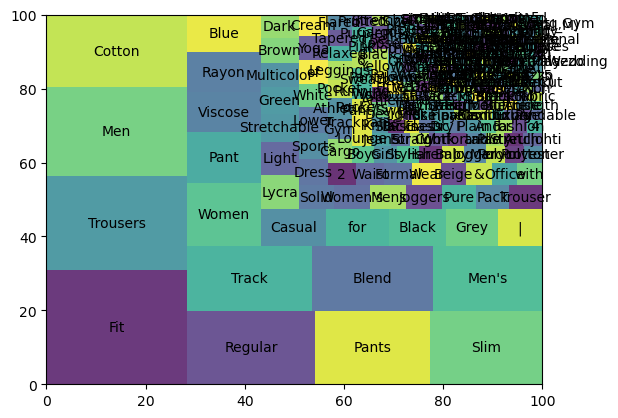

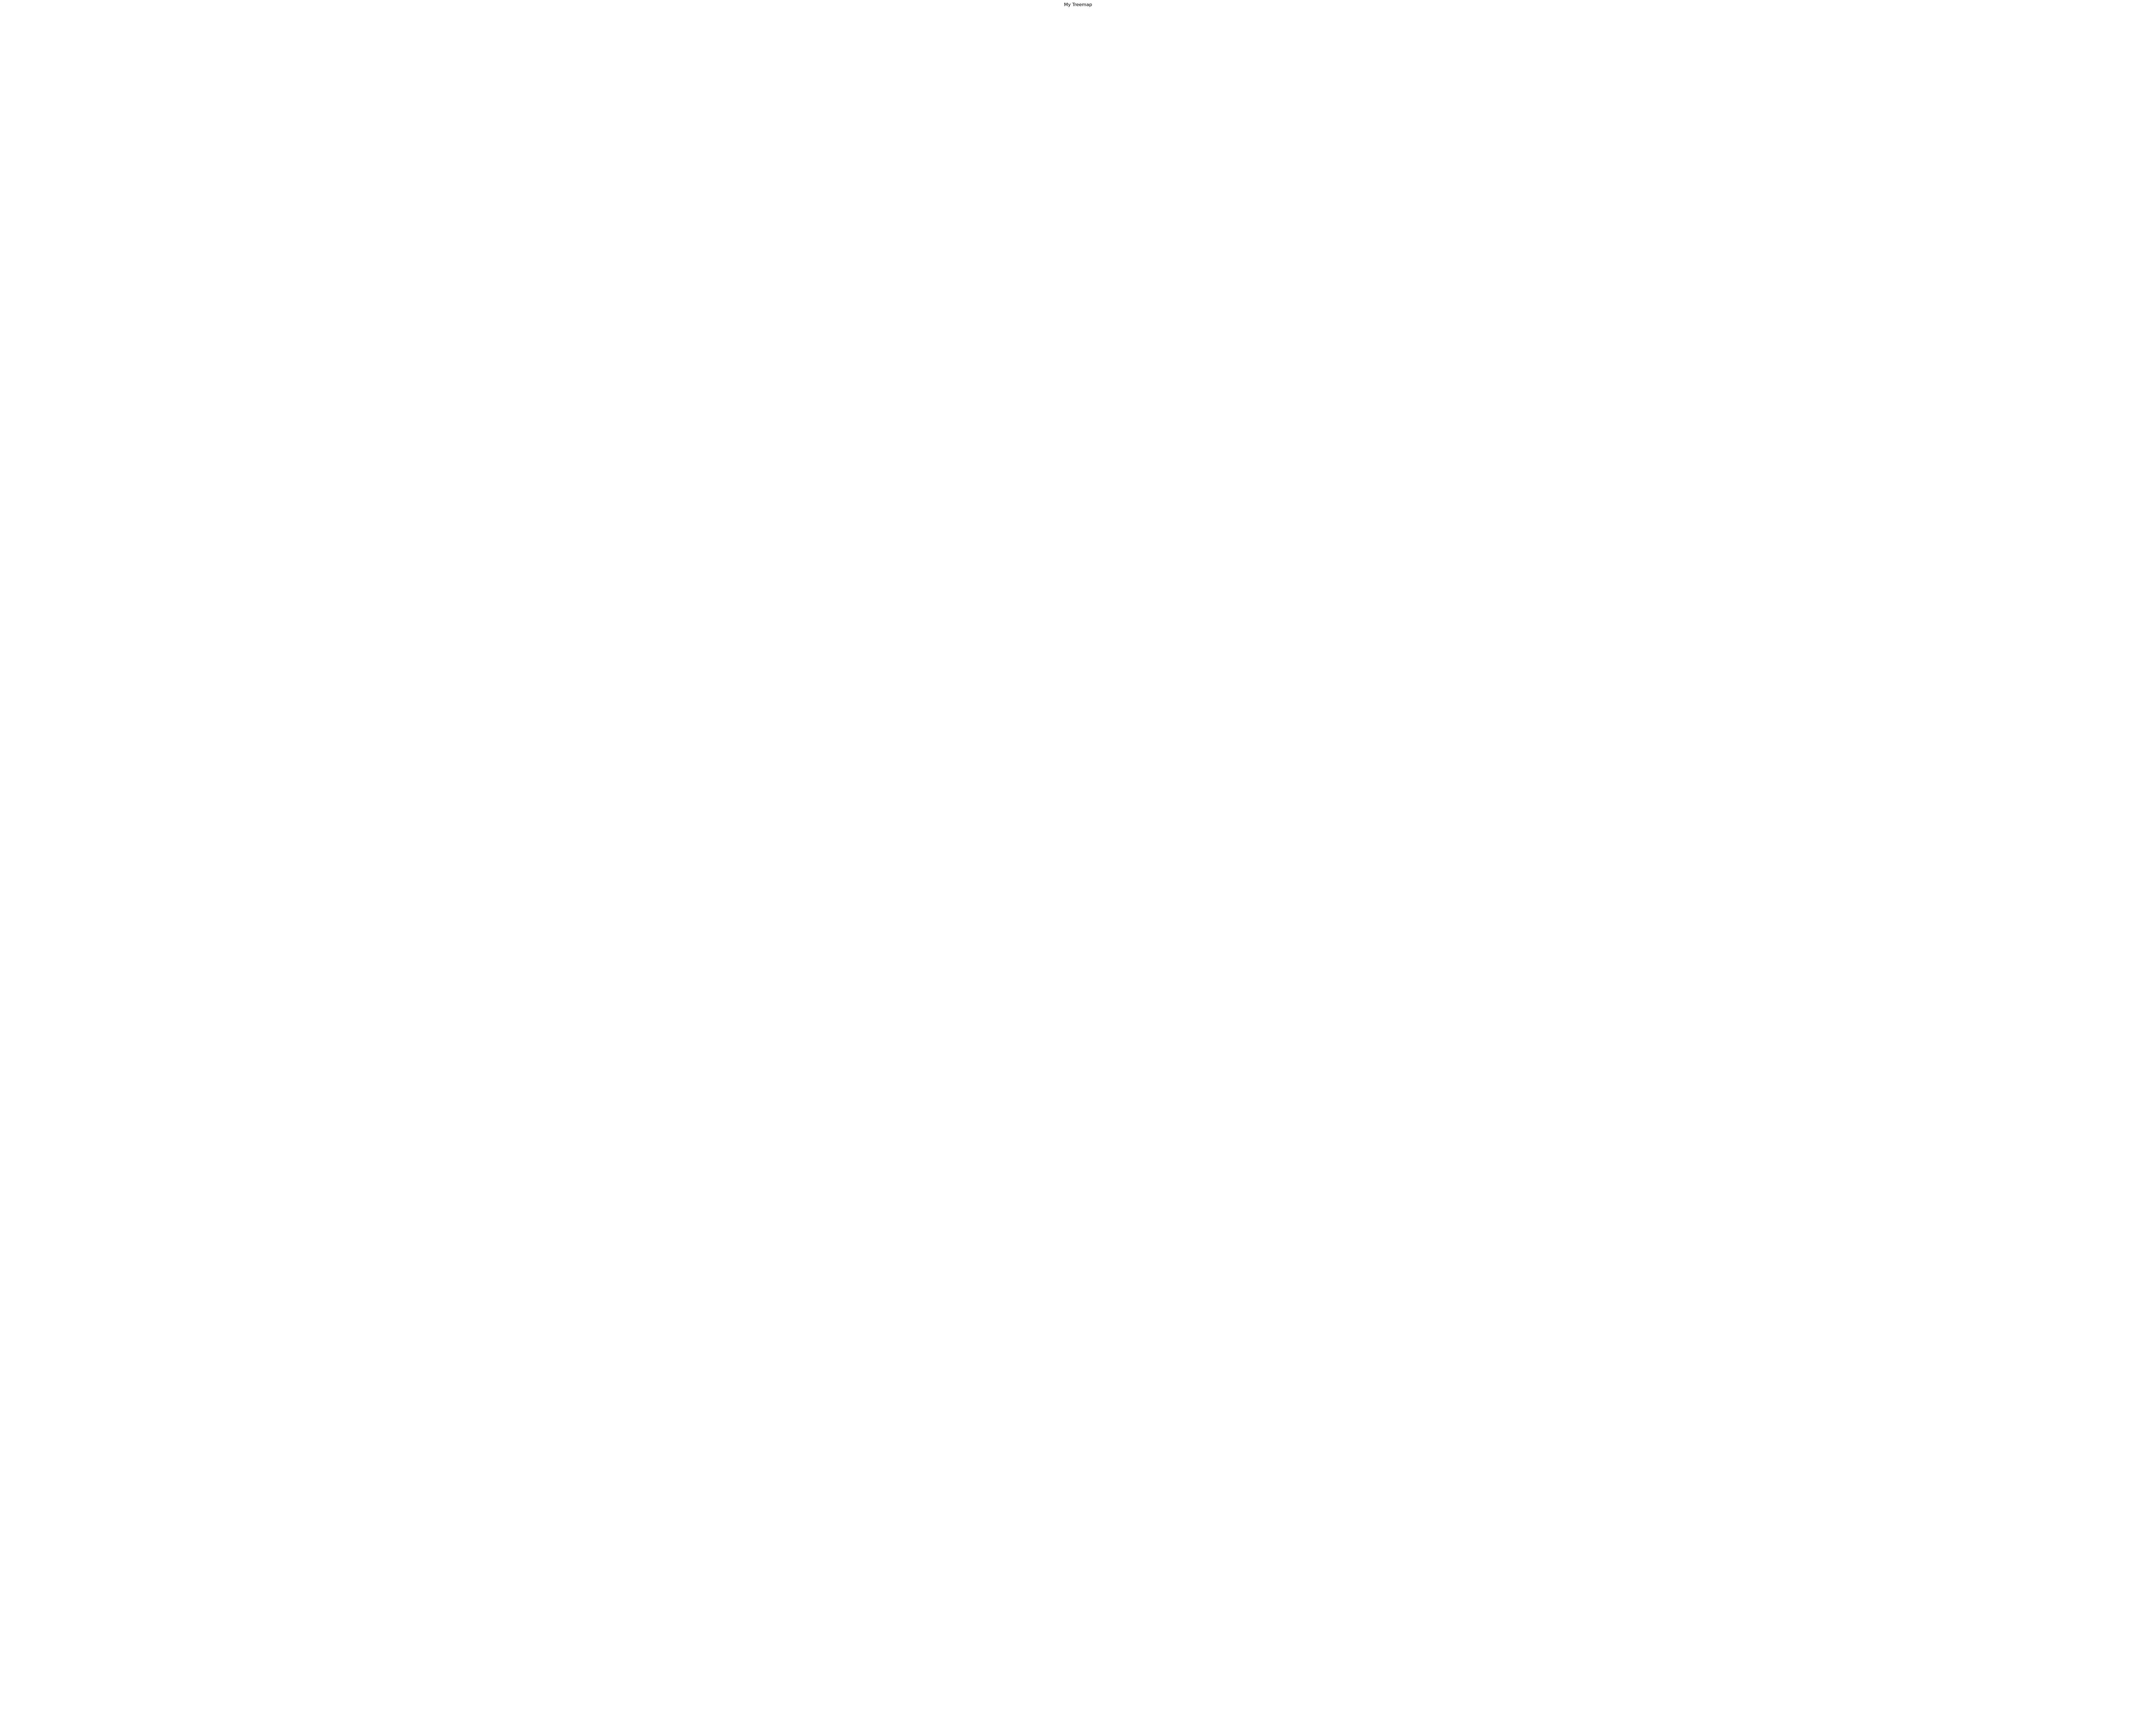

In [23]:
import matplotlib.pyplot as plt
import squarify

# Create a list of strings
mylist = count.keys()

# Assign some random values to the strings
values = count.values()

# Create a dictionary from the list and values
data = dict(zip(mylist, values))

# Sort the dictionary by values
data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

# Create a treemap using squarify
squarify.plot(sizes=data.values(), label=data.keys(), alpha=0.8)
# Add labels and title
plt.axis('off')
plt.title("My Treemap")

# Show the plot
plt.show()


Hey its time for visualizations


Women Regular Fit Multicolor Viscose Rayon Trousers Men Regular Fit Maroon Viscose Rayon Trousers Men Regular Fit Black Viscose Rayon Trousers Men Slim Fit Brown Pure Cotton Trousers Men Slim Fit Light Blue Cotton Blend Trousers Men Slim Fit Dark Blue Polycotton Trousers Men Slim Fit Light Blue Cotton Blend Trousers Men Slim Fit Grey Cotton Blend Trousers Women Regular Fit Black Viscose Rayon Trousers Men Slim Fit Grey Cotton Blend Trousers Men Slim Fit Brown Cotton Blend Trousers Women Regular Fit Dark Green Viscose Rayon Trousers Women Relaxed Pink Cotton Blend Trousers Women Regular Fit Brown Cotton Blend Trousers Women Relaxed Purple Cotton Silk Trousers Men Slim Fit Dark Blue Cotton Blend Trousers Men Slim Fit White Cotton Blend Trousers Women Regular Fit Black Cotton Blend Trousers Men Printed Blue Track Pants Men Slim Fit Grey Cotton Blend Trousers Men Slim Fit Brown Pure Cotton Trousers Men Regular Fit Grey Cotton Blend Trousers Men Slim Fit Grey Viscose Rayon Trousers Men Regu

(-0.5, 1499.5, 1499.5, -0.5)

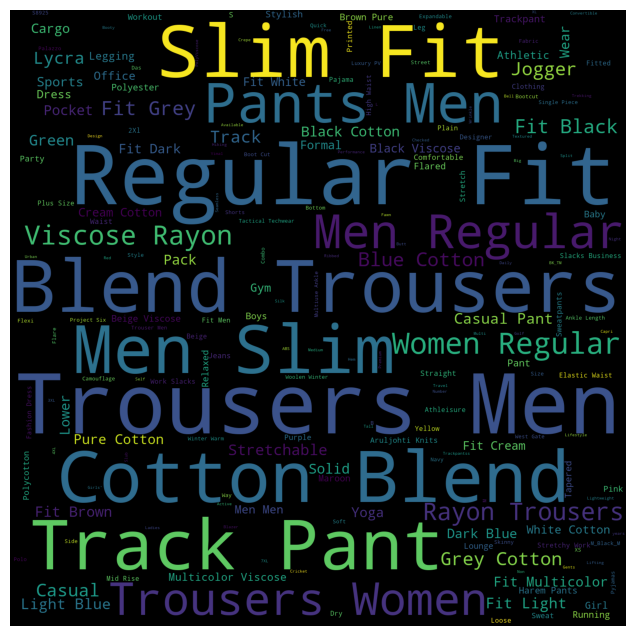

In [15]:
print(' '.join(keyWords))
wordcloud = WordCloud(width = 1500, height = 1500).generate(' '.join(keyWords))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")



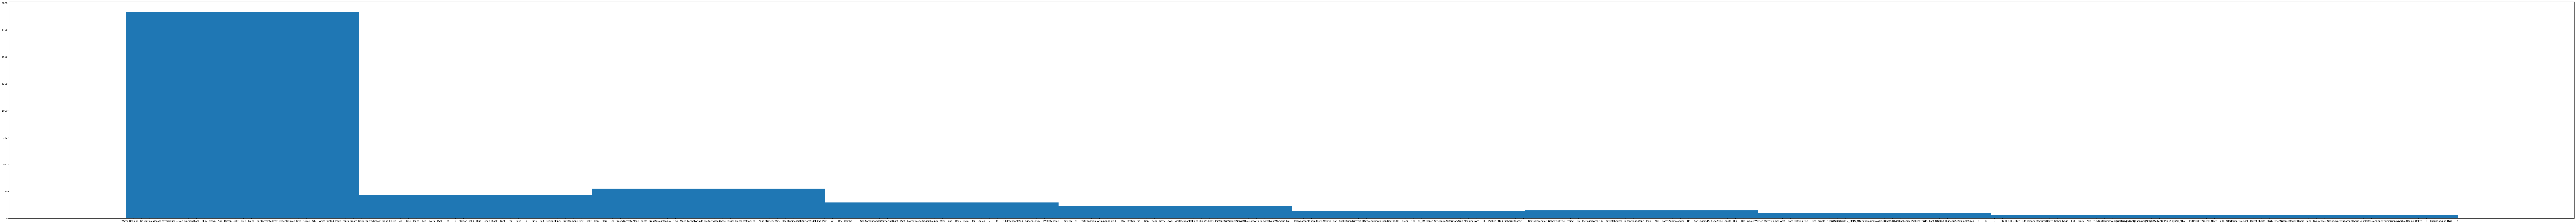

In [16]:
fig, ax = plt.subplots(figsize=(200, 17))
ax.hist(keyWords)

plt.show()


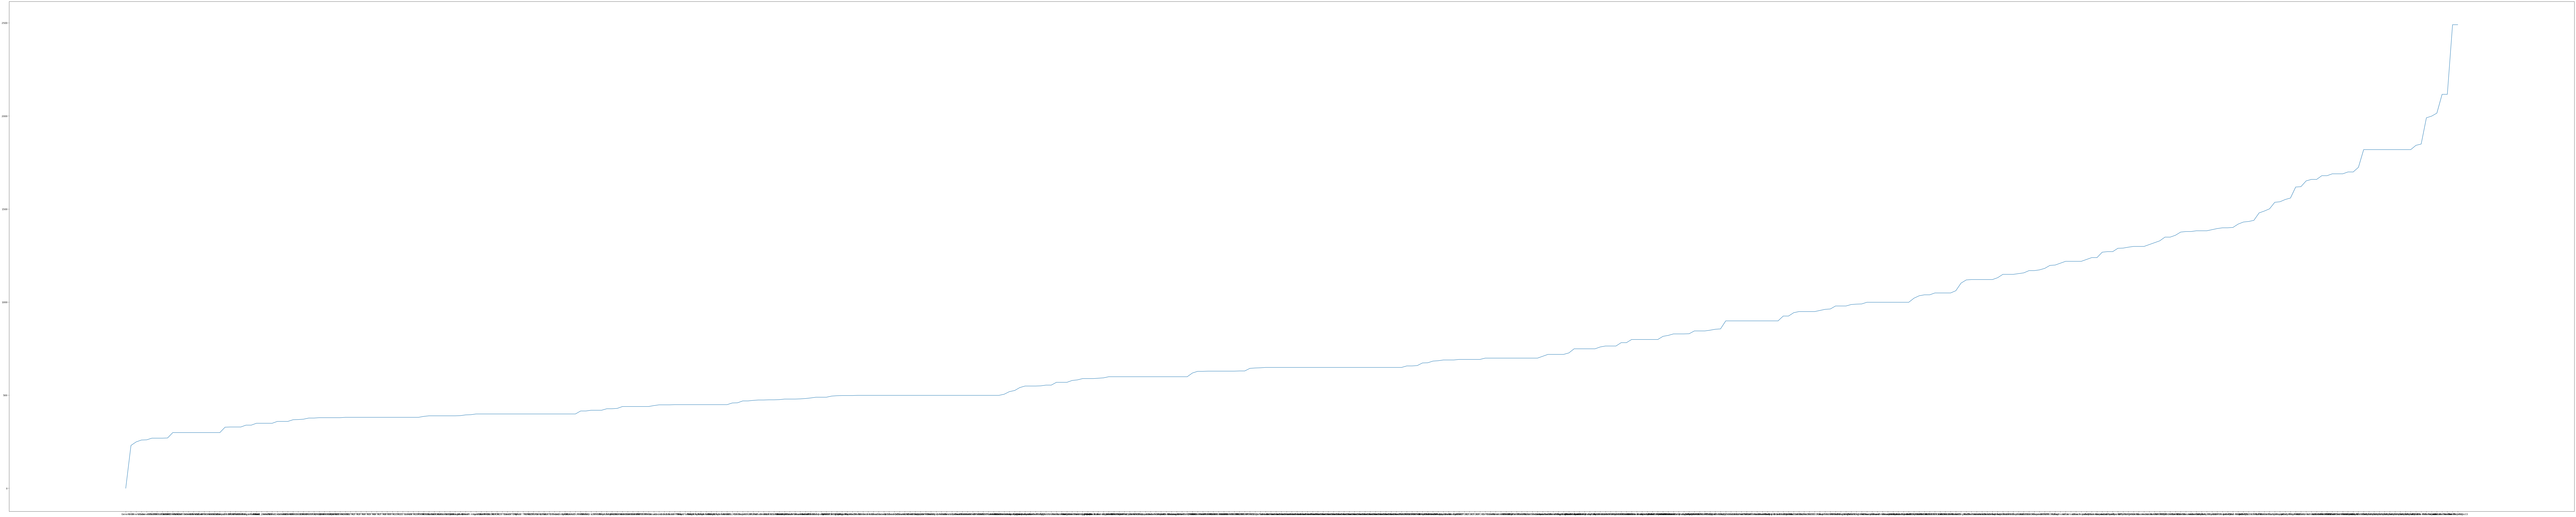

In [17]:
fig, ax = plt.subplots(figsize=(200, 40))
plt.plot(list(table.iloc[:,0]),list(table.iloc[:,2]))



In [18]:
print(set(keyWords))

{'Carrot', '(Ht9317-2Xl,', 'Lightweight', '(Track-Pant-5070)', 'Summer', 'Luxury', '66)', 'Men,', '6', 'Party|Palazzo', 'Yoga,Jogging,Gym', 'Plus', 'Flare', 'Pocket', 'Stretch', 'Designer', 'West', 'XL,', 'Bermuda,Trousers,', 'A-line', 'Work', 'Joggers,', 'Fit', 'Loose', '|', 'Green', 'Rise', 'Trekking', 'Cargo', 'B.S.', 'years.', 'Pure', 'Boho', 'Women', 'Knit', 'Shirt', 'Quick', 'Travel', '4-15', 'M,', 'Techwear', 'Polyester,', 'Free', '(119-A-BLACK)', 'Winter', 'Jogger', 'Das', 'Booty', 'Lower,', 'Plain', 'Flexi', 'Viscose', '(Pant', '3', 'Zipper', 'Mid-rise', 'Baggy', 'Design', 'Self', 'Stretchy', 'Spandex', 'Pink)', 'Casual', 'And', 'Tall', 'Solid', '-', 'Skinny', 'Running', 'Bottom', 'Party', 'Textured', 'Piece', 'Pant|Casual', 'Workout', 'Linen', 'Lycra', 'Slub', 'Grey', 'Cricket', 'Men', '(S8925-Black-M_Black_M)', 'Vimal', 'Running,', 'Shorts', 'Breathable', 'Black', 'Trackpant', 'Piping', 'Athletic', 'The', 'Tights', 'Fabric', 'S', '(Yoga', 'For', 'with', 'Way', 'Printed', 'Na